Required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

Read data from `development.csv` file:

In [2]:
ds_train = pd.read_csv("development.csv")
ds_train.head()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [21]:
ds_train

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,600.0,595.0,5.051422,-3.872162,14.537390,32.000000,1.103550,49.819376,-26.266623,24.781403,...,581.954264,-39.634247,580.419676,71.167754,0.714250,614.629732,-47.182980,594.565758,71.359798,0.345872
385496,600.0,595.0,4.067664,-5.534358,2.011714,40.200000,1.895393,51.016495,-26.138474,27.090894,...,591.334030,-40.229095,589.105579,71.562414,0.325978,589.602095,-49.995053,588.799525,71.539605,0.318873
385497,600.0,595.0,4.243555,-5.801462,3.199481,150.891763,1.248541,46.661682,-30.943115,24.980347,...,619.698505,-46.600293,582.079851,71.420761,0.430833,610.999390,-43.620535,589.163170,71.569655,0.301635
385498,600.0,595.0,14.552444,-5.017258,6.367075,72.200000,1.215713,46.515765,-22.520367,33.163073,...,597.935632,-43.848615,589.201047,71.426835,0.474301,611.263138,-49.387009,587.916994,71.466307,0.408242


In [3]:
ds_train.shape

(385500, 92)

In [4]:
print(ds_train.info)

<bound method DataFrame.info of             x      y    pmax[0]  negpmax[0]    area[0]     tmax[0]    rms[0]  \
0       200.0  200.0   4.066907  -17.690173   2.847932    0.600000  2.007042   
1       200.0  200.0   5.916801   -4.717111   5.792778   79.765174  1.564535   
2       200.0  200.0   4.286652   -5.316132   2.356390   74.600000  1.404622   
3       200.0  200.0   4.003635   -4.617459   2.189005   43.000000  1.512162   
4       200.0  200.0   4.448146   -4.848743   3.997002  196.667482  1.101113   
...       ...    ...        ...         ...        ...         ...       ...   
385495  600.0  595.0   5.051422   -3.872162  14.537390   32.000000  1.103550   
385496  600.0  595.0   4.067664   -5.534358   2.011714   40.200000  1.895393   
385497  600.0  595.0   4.243555   -5.801462   3.199481  150.891763  1.248541   
385498  600.0  595.0  14.552444   -5.017258   6.367075   72.200000  1.215713   
385499  600.0  595.0   4.203323  -21.787461   3.241678   65.200000  1.780837   

       

In [5]:
print(ds_train.columns)

Index(['x', 'y', 'pmax[0]', 'negpmax[0]', 'area[0]', 'tmax[0]', 'rms[0]',
       'pmax[1]', 'negpmax[1]', 'area[1]', 'tmax[1]', 'rms[1]', 'pmax[2]',
       'negpmax[2]', 'area[2]', 'tmax[2]', 'rms[2]', 'pmax[3]', 'negpmax[3]',
       'area[3]', 'tmax[3]', 'rms[3]', 'pmax[4]', 'negpmax[4]', 'area[4]',
       'tmax[4]', 'rms[4]', 'pmax[5]', 'negpmax[5]', 'area[5]', 'tmax[5]',
       'rms[5]', 'pmax[6]', 'negpmax[6]', 'area[6]', 'tmax[6]', 'rms[6]',
       'pmax[7]', 'negpmax[7]', 'area[7]', 'tmax[7]', 'rms[7]', 'pmax[8]',
       'negpmax[8]', 'area[8]', 'tmax[8]', 'rms[8]', 'pmax[9]', 'negpmax[9]',
       'area[9]', 'tmax[9]', 'rms[9]', 'pmax[10]', 'negpmax[10]', 'area[10]',
       'tmax[10]', 'rms[10]', 'pmax[11]', 'negpmax[11]', 'area[11]',
       'tmax[11]', 'rms[11]', 'pmax[12]', 'negpmax[12]', 'area[12]',
       'tmax[12]', 'rms[12]', 'pmax[13]', 'negpmax[13]', 'area[13]',
       'tmax[13]', 'rms[13]', 'pmax[14]', 'negpmax[14]', 'area[14]',
       'tmax[14]', 'rms[14]', 'pmax[15]', 

A data frame with 385500 observations on the 92 variables. <br/>
`X` : Position of the particle in axis x. <br/>
`Y` : Position of the particle in axis y. <br/>
`pmax` : The magnitude of the positive peak of the signal, in mV. <br/>
`negpmax` : The magnitude of the negative peak of the signal, in mV. <br/>
`area` : The area under the signal. <br/>
`tmax` : The delay (in ns) from a reference time when the positive peak of the signal occurs. <br/>
`rms` : The Root Mean Square (RMS) value of the signal. <br/>

If we have any categorical variables, we must convert them to factor. But fortunately :) we do not have any categorical variables in our dataset.

Missing Values ?

In [6]:
print(ds_train.isnull().sum().sum())

0


Continuous variables distribution:

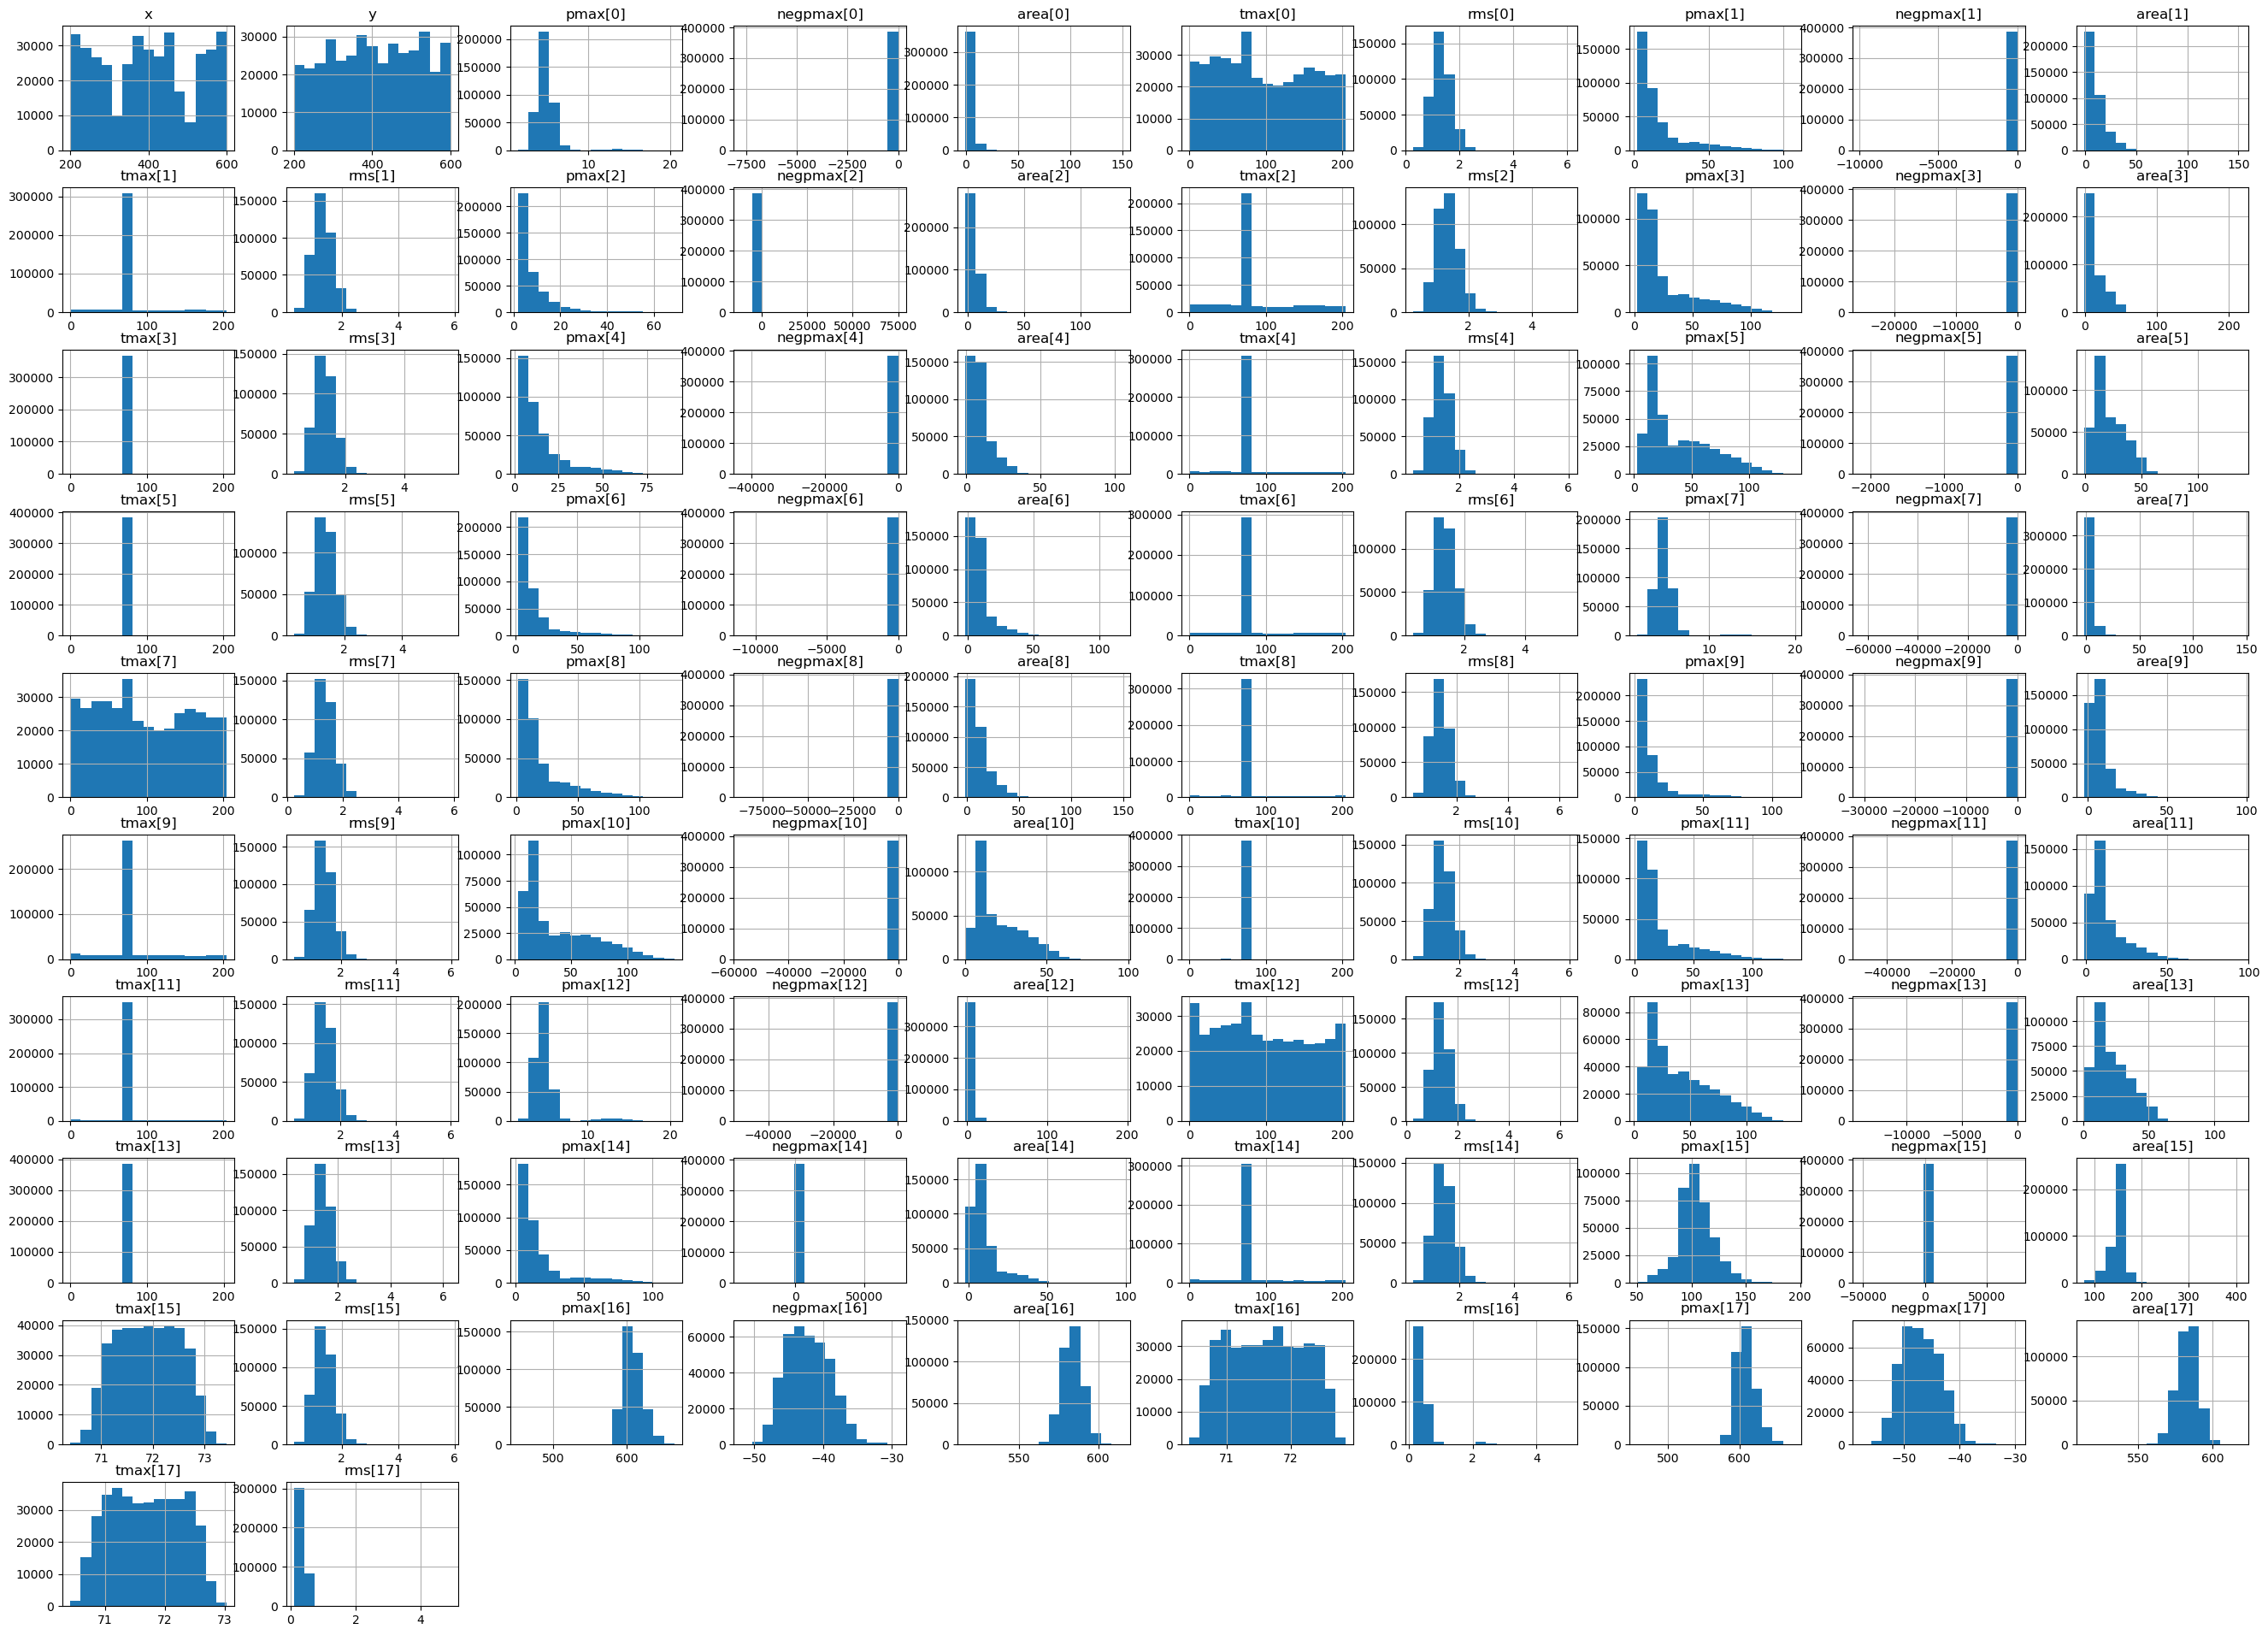

In [7]:
ds_train.hist(figsize=(33,24), bins=15)
plt.show()

Applying Tukey method into X and Y variables to indentifying the outliers:

In [8]:
tukey_ul = np.percentile(ds_train["x"], 75) + 1.5 * (np.percentile(ds_train["x"], 75) - np.percentile(ds_train["x"], 25))
perc_outlier_x = sum(ds_train["x"] > tukey_ul) / len(ds_train)
print(f"{perc_outlier_x:.2f}% of total data in X variable")

tukey_ul = np.percentile(ds_train["y"], 75) + 1.5 * (np.percentile(ds_train["y"], 75) - np.percentile(ds_train["y"], 25))
perc_outlier_y = sum(ds_train["y"] > tukey_ul) / len(ds_train)
print(f"{perc_outlier_y:.2f}% of total data in Y variable")

0.00% of total data in X variable
0.00% of total data in Y variable


Correlation analysis:

In [9]:
cor_table = ds_train.corr()
corr_table = cor_table.round(2)
print(corr_table)

                x     y  pmax[0]  negpmax[0]  area[0]  tmax[0]  rms[0]  \
x            1.00  0.01    -0.00        0.00    -0.00    -0.00   -0.00   
y            0.01  1.00     0.01       -0.00     0.00     0.00    0.00   
pmax[0]     -0.00  0.01     1.00        0.02     0.33     0.01    0.01   
negpmax[0]   0.00 -0.00     0.02        1.00     0.02     0.01   -0.00   
area[0]     -0.00  0.00     0.33        0.02     1.00     0.02   -0.01   
...           ...   ...      ...         ...      ...      ...     ...   
pmax[17]     0.01 -0.00     0.00        0.00     0.00    -0.00    0.01   
negpmax[17]  0.02  0.00     0.02        0.00     0.01     0.01   -0.02   
area[17]     0.06 -0.00     0.02        0.01     0.00     0.00    0.00   
tmax[17]     0.00  0.00     0.05       -0.00     0.01     0.01   -0.01   
rms[17]     -0.00 -0.00    -0.00       -0.00    -0.00    -0.00    0.00   

             pmax[1]  negpmax[1]  area[1]  ...  pmax[16]  negpmax[16]  \
x               0.73       -0.18     0

`Correlation` between variables using `seaborn` library:

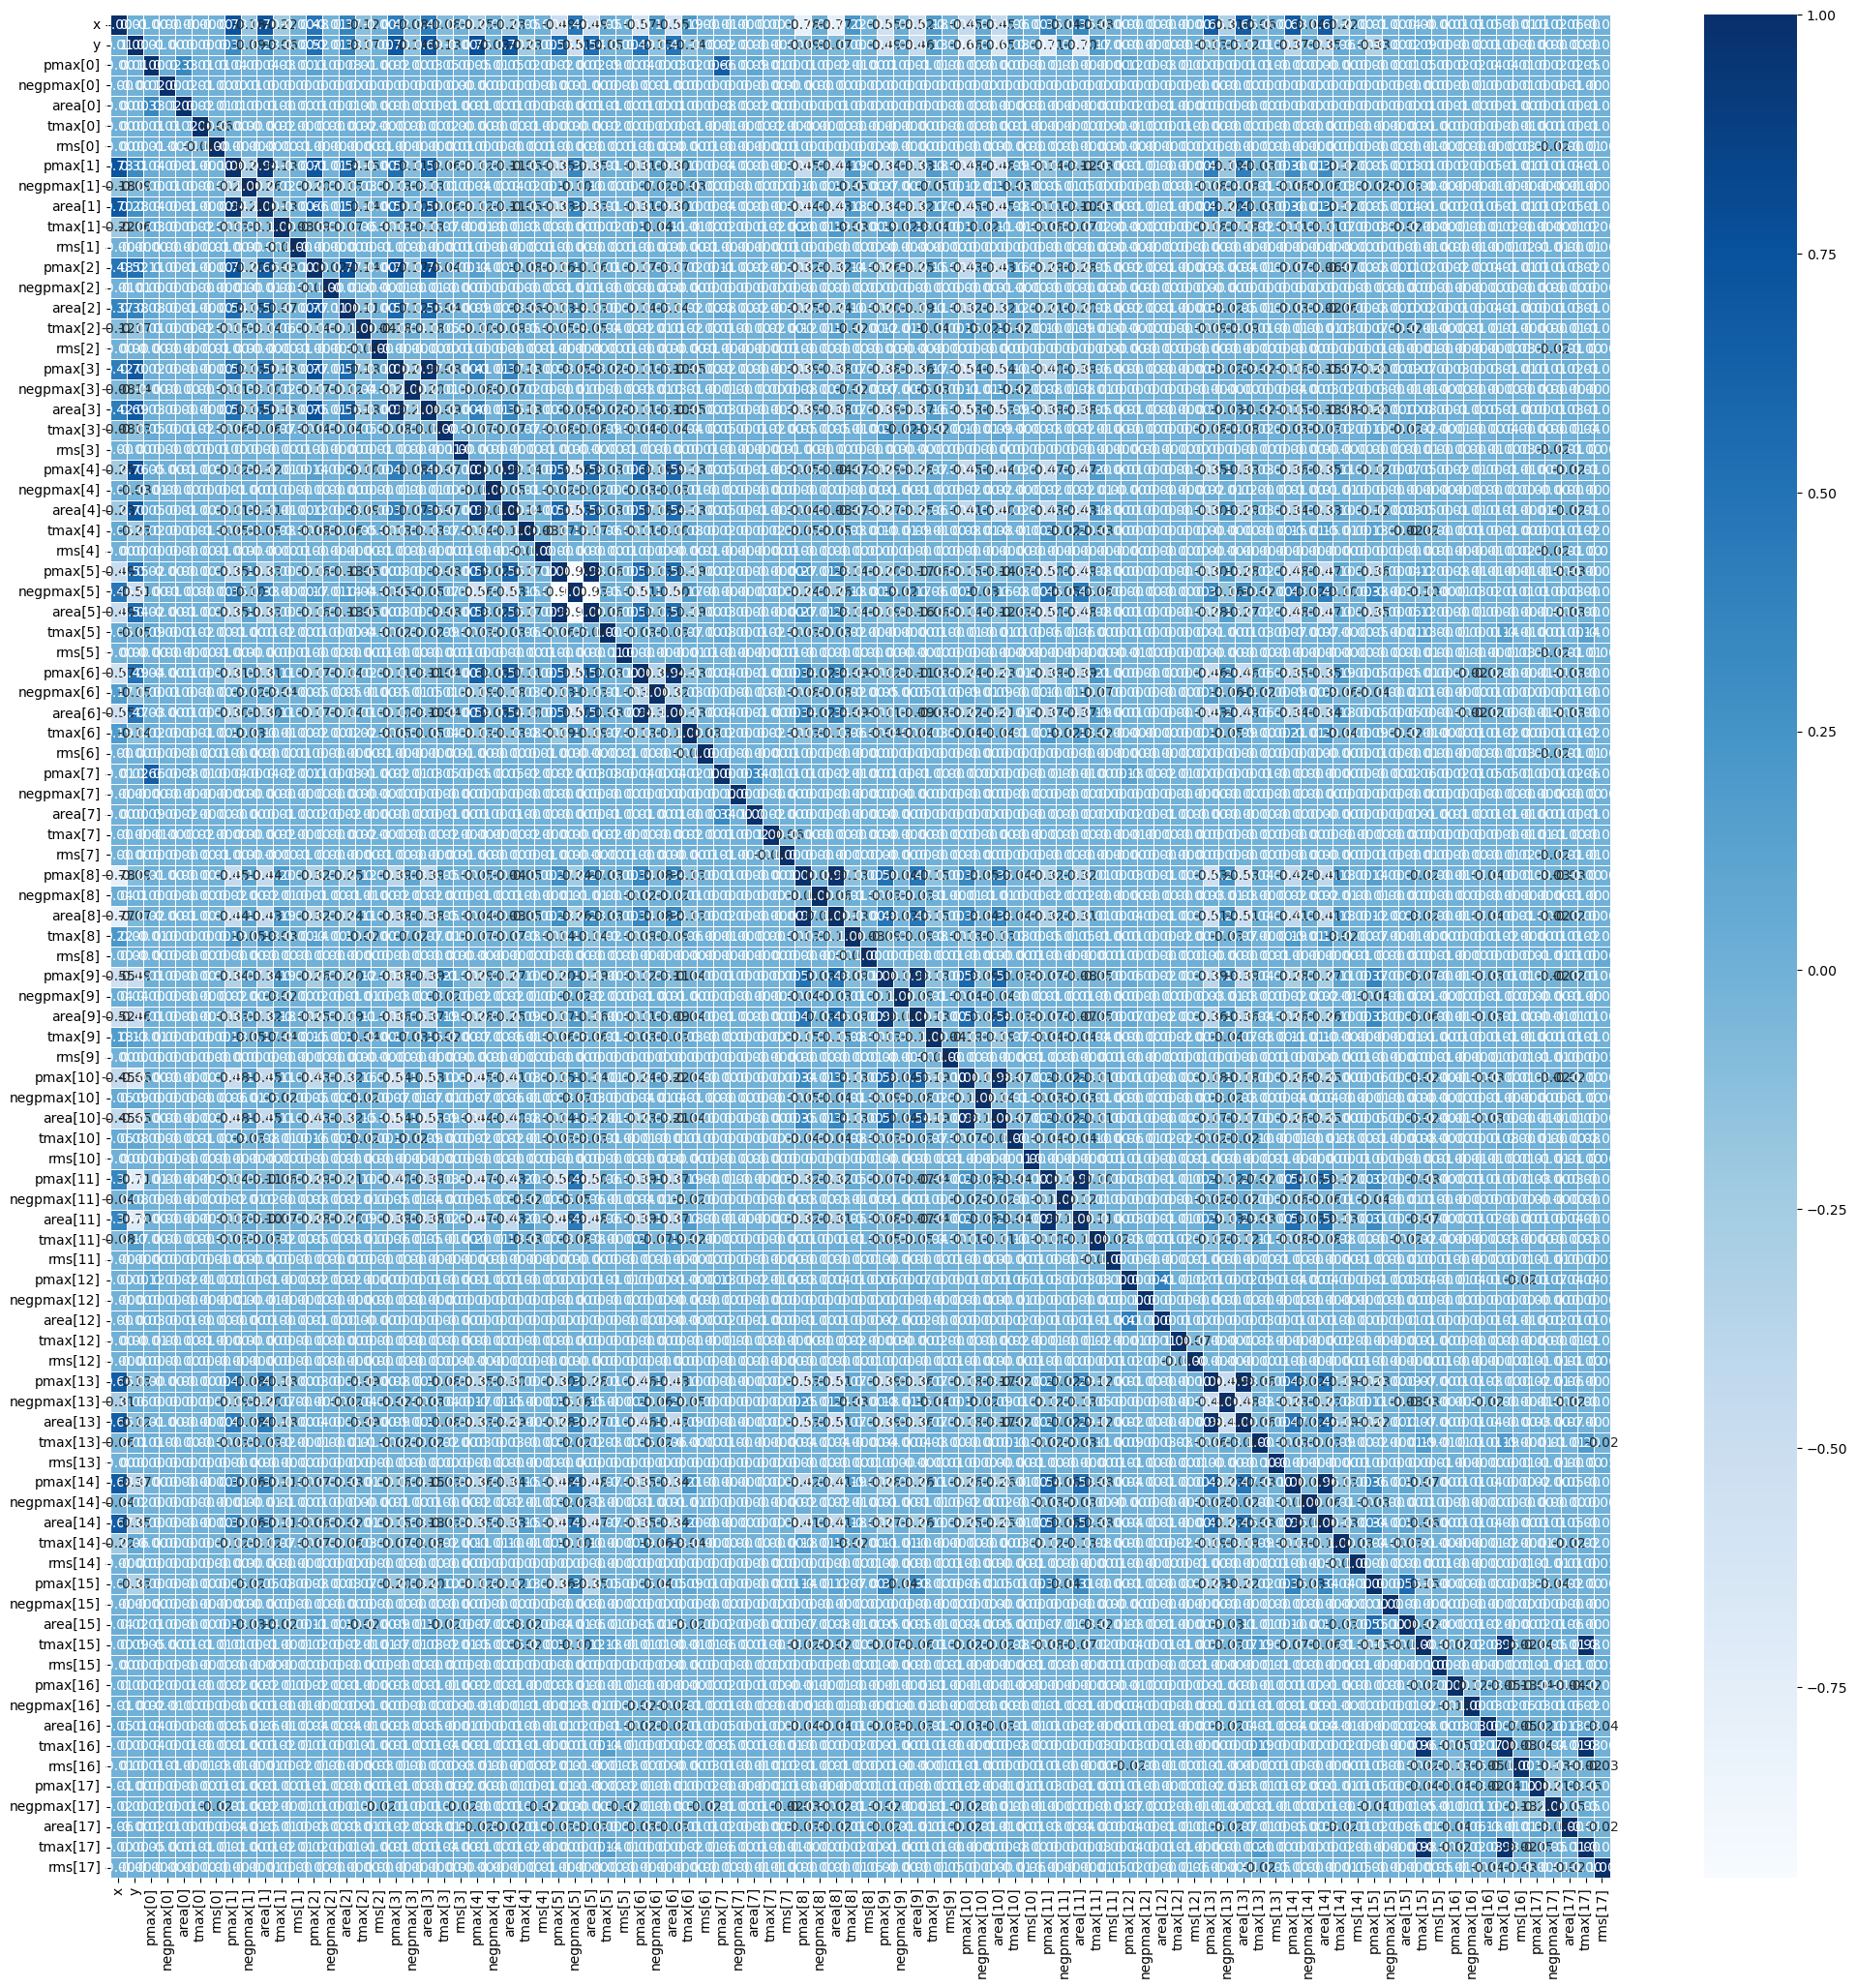

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_table, annot=True, cmap='Blues', fmt="0.2f", linewidths=0.5)
plt.show()

Here we indicated the data distribution using `box-plot` to make a better prospective of data:

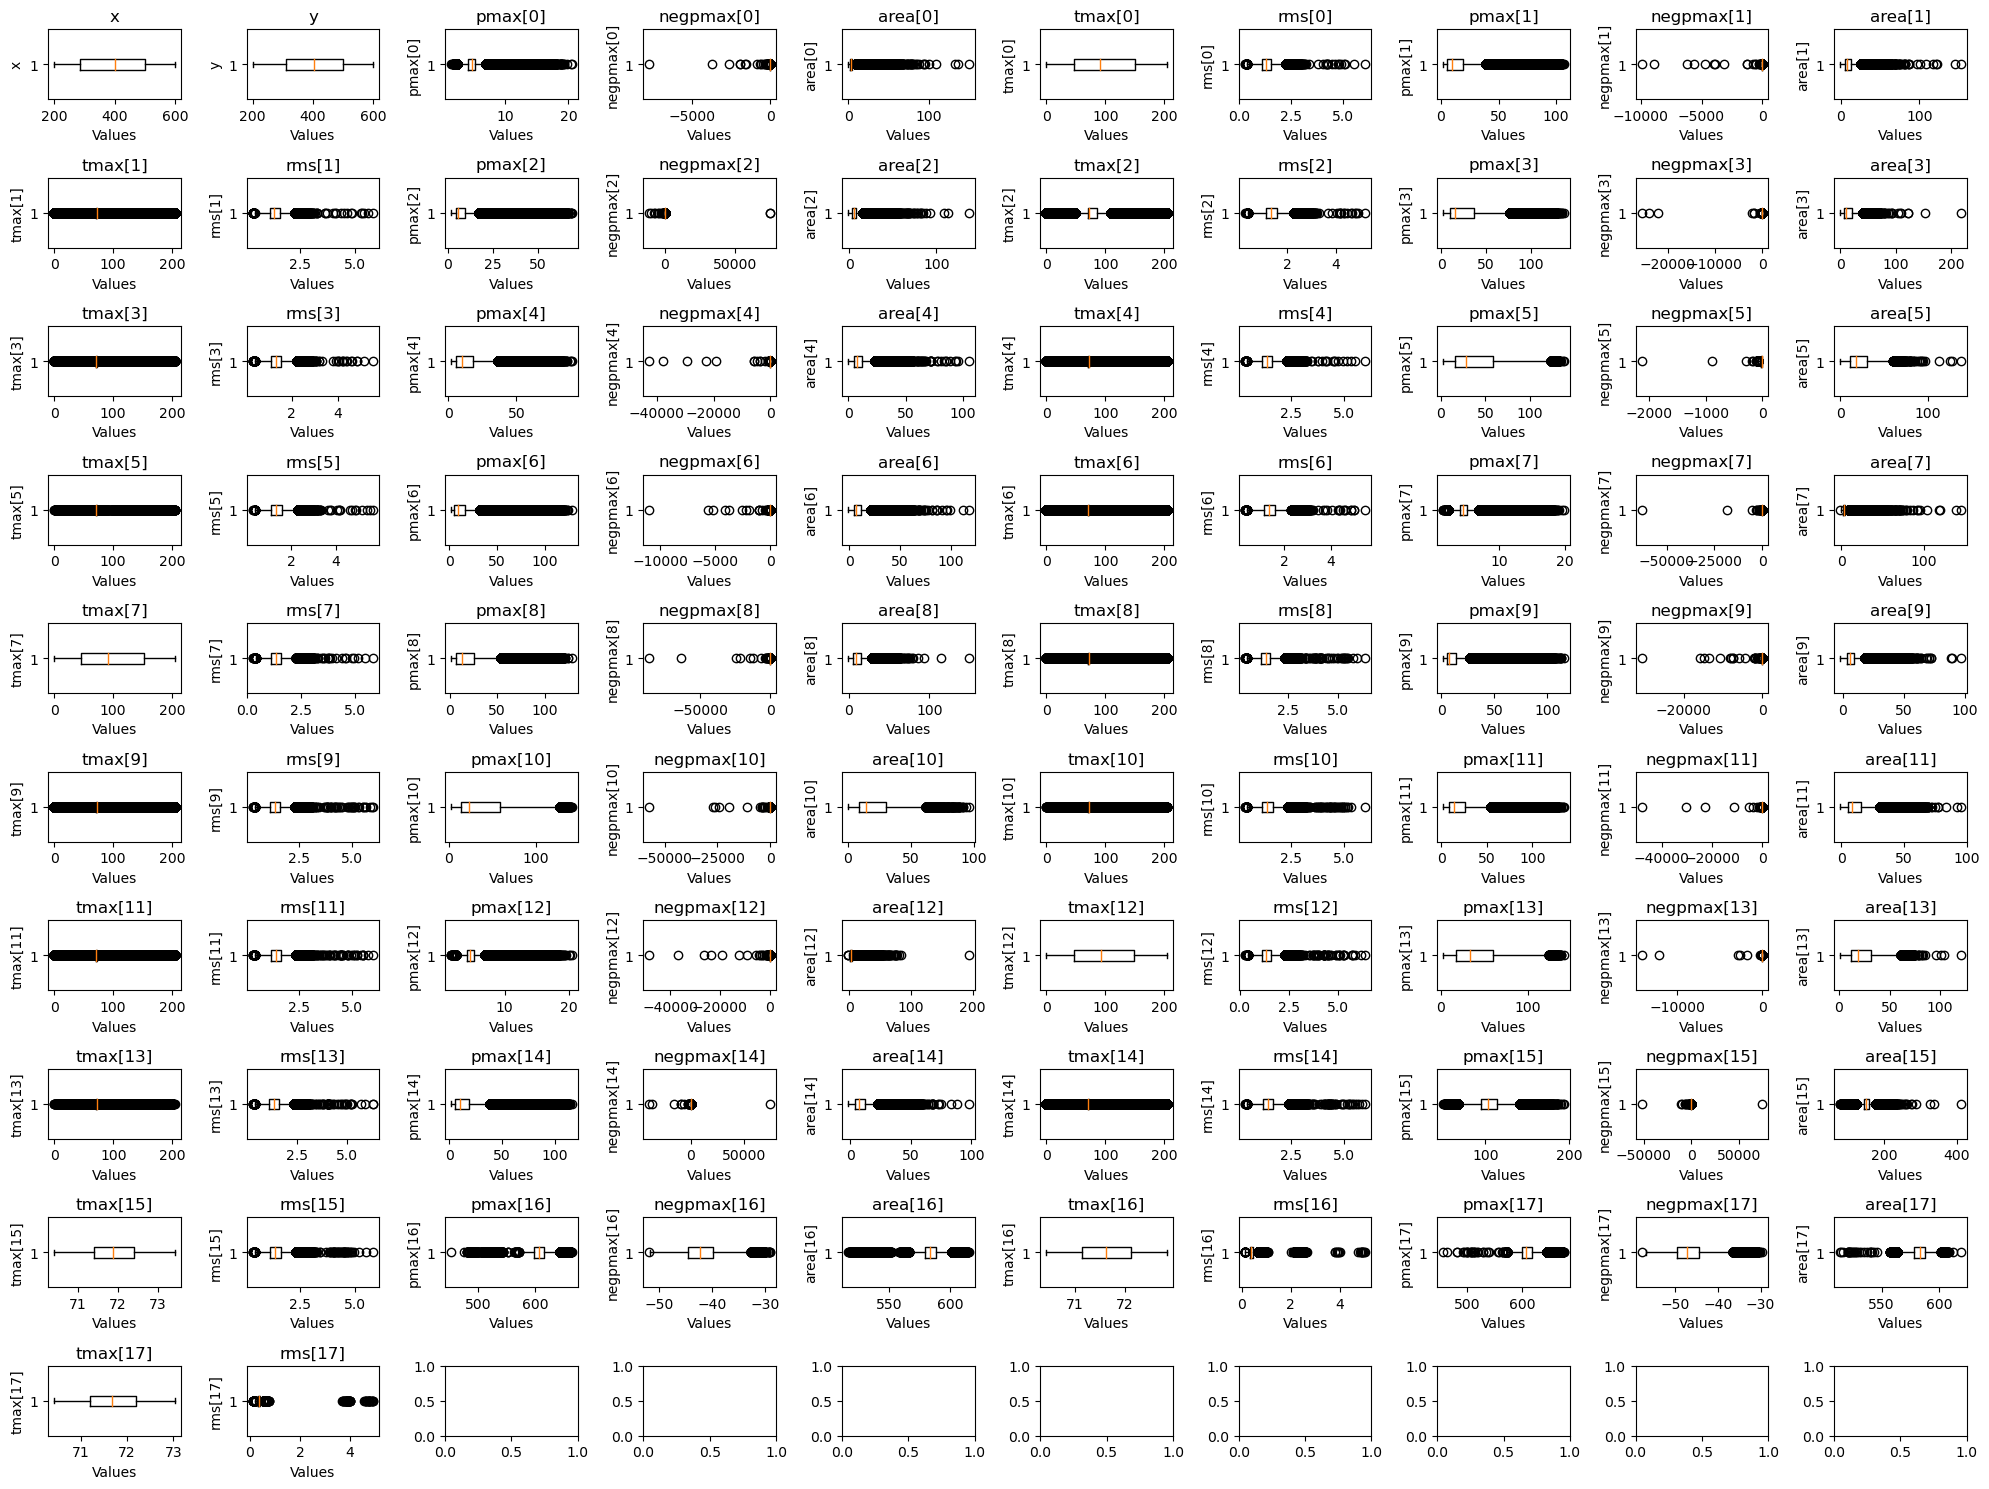

In [11]:
num_rows = 10
num_cols = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(ds_train.columns):
    row = i // num_cols
    col = i % num_cols
    
    axes[row, col].boxplot(ds_train[column], vert=False)
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel('Values')
    axes[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()

Finding out the noise columns using the preprocessing methods aforementioned and eliminate them to check wether they help to make a better prediction and reduce the training execution time or not.

In [12]:
ds_train_dropped = ds_train.drop(columns = ['negpmax[0]', 'area[0]', 'negpmax[1]', 'tmax[1]', 'negpmax[2]', 'negpmax[3]',
                                         'tmax[3]', 'negpmax[4]', 'tmax[4]', 'negpmax[5]', 'tmax[5]', 'negpmax[6]',
                                         'tmax[6]', 'negpmax[7]', 'area[7]', 'negpmax[8]', 'tmax[8]', 'negpmax[9]',
                                         'tmax[9]', 'negpmax[10]', 'tmax[10]', 'negpmax[11]', 'tmax[11]', 'negpmax[12]',
                                         'area[12]', 'negpmax[13]', 'tmax[13]', 'negpmax[14]', 'tmax[14]', 'negpmax[15]']
                             )

ds_train_dropped.describe()

,x,y,pmax[0],tmax[0],rms[0],pmax[1],area[1],rms[1],pmax[2],area[2],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,97.593811,1.340462,16.510543,10.504198,1.335660,8.784017,6.288025,...,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,59.444364,0.342167,16.781018,8.444105,0.340729,7.692692,4.758113,...,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,0.000000,0.275854,2.028134,-0.997301,0.314711,1.799435,-1.735430,...,451.502789,-51.840704,516.386725,70.420683,0.129428,456.816620,-57.876959,513.760083,70.423425,0.102138
25%,285.000000,310.000000,4.123941,46.400000,1.096611,5.619728,4.755876,1.092676,4.681271,3.116460,...,598.888989,-44.601152,579.190080,71.144733,0.342264,599.390156,-49.596344,578.269642,71.200245,0.321753
50%,400.000000,405.000000,4.668321,90.600000,1.316209,10.068513,7.886552,1.311898,5.714713,4.944174,...,607.190645,-42.360754,583.512671,71.627565,0.400117,607.202368,-47.147636,583.401620,71.681603,0.366981
75%,500.000000,500.000000,5.265888,151.026985,1.557156,19.031319,12.945553,1.552595,9.796498,7.888534,...,616.837596,-39.833169,587.982952,72.134776,0.466077,617.313303,-44.375652,587.877953,72.194196,0.415578
max,600.000000,600.000000,20.515415,204.600000,6.088277,106.649066,152.517700,5.860626,68.837366,136.872156,...,665.267443,-29.085419,614.884980,72.856918,5.031400,675.052221,-29.592059,619.099952,73.031394,4.925181


Building prediction models: <br/>
Model 1: Traditional Linear Regression Model:

In [13]:
ds_train_dropped.columns

Index(['x', 'y', 'pmax[0]', 'tmax[0]', 'rms[0]', 'pmax[1]', 'area[1]',
       'rms[1]', 'pmax[2]', 'area[2]', 'tmax[2]', 'rms[2]', 'pmax[3]',
       'area[3]', 'rms[3]', 'pmax[4]', 'area[4]', 'rms[4]', 'pmax[5]',
       'area[5]', 'rms[5]', 'pmax[6]', 'area[6]', 'rms[6]', 'pmax[7]',
       'tmax[7]', 'rms[7]', 'pmax[8]', 'area[8]', 'rms[8]', 'pmax[9]',
       'area[9]', 'rms[9]', 'pmax[10]', 'area[10]', 'rms[10]', 'pmax[11]',
       'area[11]', 'rms[11]', 'pmax[12]', 'tmax[12]', 'rms[12]', 'pmax[13]',
       'area[13]', 'rms[13]', 'pmax[14]', 'area[14]', 'rms[14]', 'pmax[15]',
       'area[15]', 'tmax[15]', 'rms[15]', 'pmax[16]', 'negpmax[16]',
       'area[16]', 'tmax[16]', 'rms[16]', 'pmax[17]', 'negpmax[17]',
       'area[17]', 'tmax[17]', 'rms[17]'],
      dtype='object')

In [14]:
ds_train_dropped.shape

(385500, 62)

Importing test set:

In [15]:
ds_test = pd.read_csv("evaluation.csv").drop(columns='Id')
ds_test_dropped = ds_test.drop(columns = ['negpmax[0]', 'area[0]', 'negpmax[1]', 'tmax[1]', 'negpmax[2]', 'negpmax[3]',
                                         'tmax[3]', 'negpmax[4]', 'tmax[4]', 'negpmax[5]', 'tmax[5]', 'negpmax[6]',
                                         'tmax[6]', 'negpmax[7]', 'area[7]', 'negpmax[8]', 'tmax[8]', 'negpmax[9]',
                                         'tmax[9]', 'negpmax[10]', 'tmax[10]', 'negpmax[11]', 'tmax[11]', 'negpmax[12]',
                                         'area[12]', 'negpmax[13]', 'tmax[13]', 'negpmax[14]', 'tmax[14]', 'negpmax[15]']
                             )
ds_test_dropped.head()

,pmax[0],tmax[0],rms[0],pmax[1],area[1],rms[1],pmax[2],area[2],tmax[2],rms[2],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,4.400616,176.600000,1.562814,8.738040,5.554105,0.729175,5.359271,3.547230,179.8,1.220856,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,5.599571,90.677386,1.129626,23.460358,17.998419,1.258335,20.116995,11.315171,72.8,1.023543,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,3.731995,155.200000,0.921757,4.837952,3.289124,0.793541,6.132150,3.578799,38.8,1.486030,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,5.657729,30.463179,1.269390,87.293692,38.422989,0.733773,25.325571,10.306552,72.0,1.978536,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,3.716666,33.600000,1.082743,9.593125,7.767408,1.572473,6.618451,3.765579,72.4,1.066749,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


In [22]:
print(ds_test.info)

<bound method DataFrame.info of          pmax[0]  negpmax[0]    area[0]     tmax[0]    rms[0]    pmax[1]  \
0       4.400616   -4.257770   2.860212  176.600000  1.562814   8.738040   
1       5.599571   -2.974570   9.400537   90.677386  1.129626  23.460358   
2       3.731995   -5.662292   1.930957  155.200000  0.921757   4.837952   
3       5.657729   -4.600342   5.593030   30.463179  1.269390  87.293692   
4       3.716666   -4.583796   1.946927   33.600000  1.082743   9.593125   
...          ...         ...        ...         ...       ...        ...   
128495  5.847174   -3.001292   7.113683  184.584936  1.513353   9.327438   
128496  3.965027   -5.731628   1.695105  121.600000  1.566503   5.833882   
128497  3.630357   -5.045407   2.052289  115.074970  1.493089  19.402353   
128498  3.690116   -5.391879   3.624717  166.925787  1.132331   4.200095   
128499  4.999925   -2.938385  12.074915  165.282292  0.983532   5.997916   

        negpmax[1]    area[1]    tmax[1]    rms[1]  ...

Model 1 : Linear Regression Model `[d=17.351]`

In [16]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

regr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])

regr.fit(features, targets)
predictions1 = regr.predict(ds_test).round(1)
predictions1

array([[452.9, 346.4],
       [506. , 513.9],
       [200.1, 413. ],
       ...,
       [465.7, 586.1],
       [239.4, 388.8],
       [416.3, 223.4]])

Model 2 : Ridge Regression model `[d=17.483]`

In [17]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

regr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(Ridge(random_state=123)))
])

regr.fit(features, targets)
predictions2 = regr.predict(ds_test).round(1)
predictions2

array([[452.9, 346.4],
       [506. , 514. ],
       [200.1, 413. ],
       ...,
       [465.7, 586.1],
       [239.4, 388.8],
       [416.3, 223.4]])

Model 3 : Lasso Regression Model `[d=17.888]`

In [18]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

regr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(Lasso(random_state=123)))
])

regr.fit(features, targets)
predictions3 = regr.predict(ds_test).round(1)
predictions3

array([[450.4, 360.7],
       [497.5, 522.3],
       [197.8, 396. ],
       ...,
       [463.9, 589.4],
       [233.1, 379.6],
       [413.2, 228.8]])

Model 4 : XGBRegressor Model `[d=5.208 w/ noises]` `[d=7.443 w/o noises]`

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [96]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(xgb.XGBRegressor(objective='reg:tweedie', n_estimators=1000, max_depth=10,
                                                        random_state=42)))
])
xgb_pipeline.fit(features, targets)

predictions_xgb = xgb_pipeline.predict(ds_test).round(1)
predictions_xgb

array([[488.8, 327.6],
       [552.6, 602.1],
       [207.9, 398.8],
       ...,
       [464. , 591.4],
       [233.2, 388.5],
       [403.2, 213.3]], dtype=float32)

Model 5 : Desicion Tree Model [d=7.569]

In [19]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(DecisionTreeRegressor(max_depth=100, min_samples_split=30, min_samples_leaf=15,
                                                             random_state=42)))
])

pipe_dt.fit(features, targets)
predictions_dt = pipe_dt.predict(ds_test).round(1)
predictions_dt

array([[487. , 320. ],
       [552.2, 569.3],
       [207. , 403.4],
       ...,
       [461.9, 589.1],
       [227.6, 391.7],
       [400. , 205.6]])

Model 6 : Bagging Regression Model `[d=6.948]`

In [58]:
features = ds_train_dropped.drop(['x', 'y'], axis=1)
targets = ds_train_dropped[['x', 'y']]

X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(base_model, n_estimators=10, random_state=42)

bagging_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(bagging_regressor))
])

bagging_pipeline.fit(X_train, y_train)

predictions_val = bagging_pipeline.predict(X_val)
mse_val = mean_squared_error(y_val, predictions_val)
print(f'Mean Squared Error on Validation Data: {mse_val}')

predictions_bag = bagging_pipeline.predict(ds_test_dropped).round(1)
predictions_bag

Mean Squared Error on Validation Data: 28.25574092088197


array([[492. , 321.5],
       [549.5, 553.5],
       [210.5, 396.5],
       ...,
       [455. , 587.5],
       [228.5, 378. ],
       [409.5, 208. ]])

Model 7 : Forward Stepwise Selection Model `[It takes too much time in training section due to its one-to-one feature comparison algorithm]`

In [ ]:
features = ds_train_dropped.drop(['x', 'y'], axis=1)
targets = ds_train_dropped[['x', 'y']]

X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=123)

selected_features = set()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(Ridge(random_state=42)))
])

best_score = 0
best_model = None
best_features = None

for k in range(features.shape[1]):
    remaining_features = list(set(features.columns) - selected_features)
    candidate_models = []

    for feature in remaining_features:
        candidate_features = list(selected_features) + [feature]

        pipeline.fit(X_train[candidate_features], y_train)
        scores = cross_val_score(pipeline, X_train[candidate_features], y_train, cv=5, scoring='r2')

        avg_score = scores.mean()

        candidate_models.append((avg_score, feature))

    best_candidate = max(candidate_models, key=lambda x: x[0])

    selected_features.add(best_candidate[1])
    if best_candidate[0] > best_score:
        best_score = best_candidate[0]
        best_model = pipeline
        best_features = list(selected_features)

best_model.fit(X_train[best_features], y_train)
validation_score = best_model.score(X_val[best_features], y_val)
print(f"Best R-squared on Validation Data: {validation_score}")

predictions_forward = best_model.predict(ds_test_dropped[best_features]).round(1)
predictions_forward

Model 8 : Random Forest Model `[It also takes too much to run!]`

In [ ]:
features = ds_train.drop(['x', 'y'], axis=1)
targets = ds_train[['x', 'y']]

regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
)
regr_multirf.fit(features, targets)
predictions_rf = regr_multirf.predict(ds_test.drop(columns='Id')).round(1)
predictions_rf

In [ ]:
result = pd.DataFrame(predictions_dt, columns=("Id", "Predicted"))
result['Id'], result['Predicted'] = result['Id'].apply(lambda x: f"{x:0.1f}"), result['Predicted'].apply(lambda x: f"{x:0.1f}")
result['Predicted'] = result[['Id', 'Predicted']].apply(lambda row: f"{row['Id']}|{row['Predicted']}", axis=1)
for i in range(0, len(result)):
    result['Id'][i] = i
result

In [99]:
pd.DataFrame(result, columns=('Id', 'Predicted')).to_csv('submission.csv', index=False)